<a href="https://colab.research.google.com/github/narender5162/Project-Data-science-imp/blob/main/Project_Data_Science_impo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import express as px


In [170]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing file

In [171]:
file_path = '/content/drive/MyDrive/international-visitors-london-raw.csv'

In [172]:
# Load dataset with encoding fix (handling special characters)
df = pd.read_csv(file_path, encoding = "ISO-8859-1")


In [173]:
# Display the first few rows
print (df.head())

   year        quarter   market     dur_stay mode        purpose     area  \
0  2002  January-March  Belgium  1-3  nights  Air        Holiday   LONDON   
1  2002  January-March  Belgium  1-3  nights  Air       Business   LONDON   
2  2002  January-March  Belgium  1-3  nights  Air            VFR   LONDON   
3  2002  January-March  Belgium  1-3  nights  Air  Miscellaneous   LONDON   
4  2002  January-March  Belgium  1-3  nights  Sea       Business   LONDON   

   Visits (000s)  Spend (£m)  Nights (000s)  sample  
0       3.572186    0.969138       6.954456       5  
1       9.284226    2.399577      12.604959      19  
2       0.877182    0.089833       2.153128       3  
3       0.163874    0.010160       0.163874       1  
4       1.648670    0.016789       1.650300       1  


In [174]:
# Display the last few rows
print(df.tail())

        year        quarter        market     dur_stay mode        purpose  \
61457  2020P  January-March  Other Africa  4-7  nights  Air  Miscellaneous   
61458  2020P  January-March  Other Africa  8-14 nights  Air        Holiday   
61459  2020P  January-March  Other Africa  8-14 nights  Air            VFR   
61460  2020P  January-March  Other Africa  15+  nights  Air        Holiday   
61461  2020P  January-March  Other Africa  15+  nights  Air            VFR   

          area  Visits (000s)  Spend (£m)  Nights (000s)  sample  
61457   LONDON       1.695331    1.103167       8.831038       2  
61458   LONDON       1.486972    2.022254       7.836555       1  
61459   LONDON       2.416554    1.847152      63.894432       2  
61460   LONDON       2.472653    1.006109      35.080377       2  
61461   LONDON       4.124325    3.960705     134.909755       4  


In [175]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61462 entries, 0 to 61461
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           61462 non-null  object 
 1   quarter        61462 non-null  object 
 2   market         61462 non-null  object 
 3   dur_stay       61462 non-null  object 
 4   mode           61462 non-null  object 
 5   purpose        61462 non-null  object 
 6   area           61462 non-null  object 
 7   Visits (000s)  61462 non-null  float64
 8   Spend (£m)     61462 non-null  float64
 9   Nights (000s)  61462 non-null  float64
 10  sample         61462 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 5.2+ MB
None


In [176]:
# Convert 'year' column to integer and fix '2020P' issue (handle numeric cases)
df['year'] = df['year'].astype(str).str.replace("P", "").astype(int)


In [177]:
# Remove special characters from categorical columns
# - This ensures that only letters, numbers, spaces, and dashes remain in categorical columns
categorical_cols = ['quarter', 'market', 'mode', 'purpose']
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.replace(r"[^a-zA-Z0-9_ -]", "", regex=True))

# Step: Rename numerical columns for consistency
# - This makes sure that column names are standardized before further processing
df.rename(columns={"Visits (000s)": "visits_000s", "Spend (£m)": "spend_m", "Nights (000s)": "nights_000s"}, inplace=True)


In [178]:
#Fix column names for numerical columns (Ensure proper naming before conversion)
df.rename(columns={"Visits (000s)": "visits_000s", "Spend (£m)": "spend_m", "Nights (000s)": "nights_000s"}, inplace=True)

# Convert numerical columns to proper format and remove negatives
numerical_cols = ["visits_000s", "spend_m", "nights_000s"]
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')
df = df[df[numerical_cols].ge(0).all(axis=1)]


In [179]:
 #Drop 'area' column if it exists (avoid errors if missing)
if 'area' in df.columns:
    df.drop(columns=['area'], inplace=True)

# Remove duplicate rows to keep only unique records
df.drop_duplicates(inplace=True)

#Drop rows where 'year' is missing to maintain consistency
df.dropna(subset=['year'], inplace=True)


In [193]:
#Verify categorical columns to check for inconsistencies (Exclude 'area')
categorical_columns = ['quarter', 'market', 'dur_stay', 'mode', 'purpose']
categorical_issues = {col: df[col].unique() for col in categorical_columns}
print("Categorical Column Check:")
for col, values in categorical_issues.items():
    print(f"{col}: {values}")

Categorical Column Check:
quarter: ['January-March' 'April-June' 'July-September' 'October-December']
market: ['Belgium' 'Luxembourg' 'France' 'Germany' 'Italy' 'Netherlands' 'Denmark'
 'Greece' 'Spain' 'Portugal' 'Austria' 'Sweden' 'Finland' 'Irish Republic'
 'Turkey' 'Switzerland' 'Norway' 'Iceland' 'Czech Republic' 'Poland'
 'Hungary' 'Russia' 'Other Western Europe' 'Other Eastern Europe' 'USA'
 'Canada' 'Mexico' 'Brazil' 'Argentina' 'Other Central  South America'
 'Hong Kong' 'Malaysia' 'Thailand' 'Singapore' 'Taiwan' 'China'
 'Other Asia' 'Japan' 'South Korea' 'Australia' 'New Zealand'
 'United Arab Emirates' 'Saudi Arabia' 'Kuwait' 'Other Middle East'
 'Egypt' 'Israel' 'India' 'Pakistan' 'South Africa'
 'Other Southern Africa' 'Nigeria' 'Kenya' 'Other Africa' 'Bulgaria'
 'Romania' 'Serbia' 'Chile' 'Indonesia' 'Bahrain' 'Oman' 'Qatar']
dur_stay: ['1-3  nights' '4-7  nights' '8-14 nights' '15+  nights']
mode: ['Air' 'Sea' 'Tunnel']
purpose: ['Holiday' 'Business' 'VFR' 'Miscellaneou

In [181]:
# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(cleaned_file_path), exist_ok=True)

cleaned_file_path = "/mnt/data/london_cleaned_backup.csv"
df.to_csv(cleaned_file_path, index=False)


In [182]:
# Display dataset information after cleaning
print("Data Cleaning Completed. Final Dataset Info:")
df.info()

Data Cleaning Completed. Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61462 entries, 0 to 61461
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         61462 non-null  int64  
 1   quarter      61462 non-null  object 
 2   market       61462 non-null  object 
 3   dur_stay     61462 non-null  object 
 4   mode         61462 non-null  object 
 5   purpose      61462 non-null  object 
 6   visits_000s  61462 non-null  float64
 7   spend_m      61462 non-null  float64
 8   nights_000s  61462 non-null  float64
 9   sample       61462 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 4.7+ MB


In [183]:
# Display first few cleaned rows to verify
print("Sample Cleaned Data:")
print(df.head())


Sample Cleaned Data:
   year        quarter   market     dur_stay mode        purpose  visits_000s  \
0  2002  January-March  Belgium  1-3  nights  Air        Holiday     3.572186   
1  2002  January-March  Belgium  1-3  nights  Air       Business     9.284226   
2  2002  January-March  Belgium  1-3  nights  Air            VFR     0.877182   
3  2002  January-March  Belgium  1-3  nights  Air  Miscellaneous     0.163874   
4  2002  January-March  Belgium  1-3  nights  Sea       Business     1.648670   

    spend_m  nights_000s  sample  
0  0.969138     6.954456       5  
1  2.399577    12.604959      19  
2  0.089833     2.153128       3  
3  0.010160     0.163874       1  
4  0.016789     1.650300       1  


In [184]:
#Exploratory Data Analysis (EDA)
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the cleaned dataset
df.to_csv(cleaned_file_path, index=False)

<ipython-input-185-22e8d049e797>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="Blues_r")


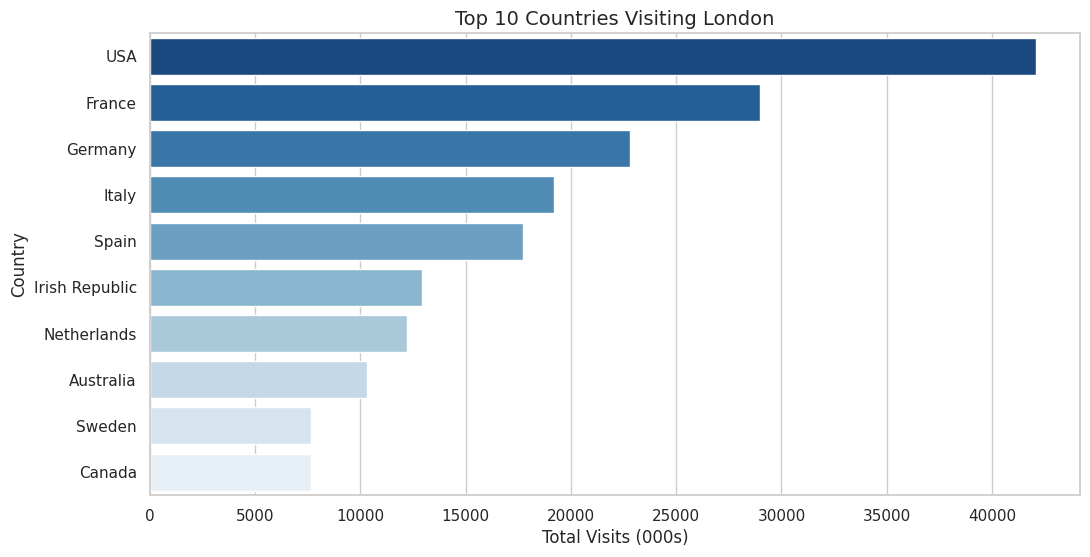

In [185]:
#Top 10 Visitor Countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="Blues_r")
plt.title("Top 10 Countries Visiting London", fontsize=14)
plt.xlabel("Total Visits (000s)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.show()

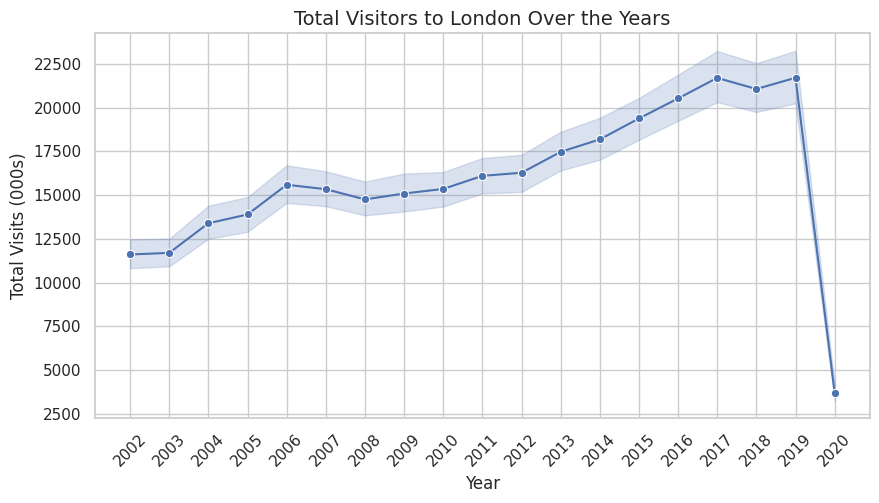

In [186]:
#Visitor Trends Over Time (Yearly & Quarterly)
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="year", y="visits_000s", estimator="sum", marker="o", color="b")
plt.xticks(np.arange(df["year"].min(), df["year"].max() + 1, step=1), rotation=45)
plt.title("Total Visitors to London Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Visits (000s)", fontsize=12)
plt.show()

<ipython-input-187-c7dd27fdeb9d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="Blues_r")


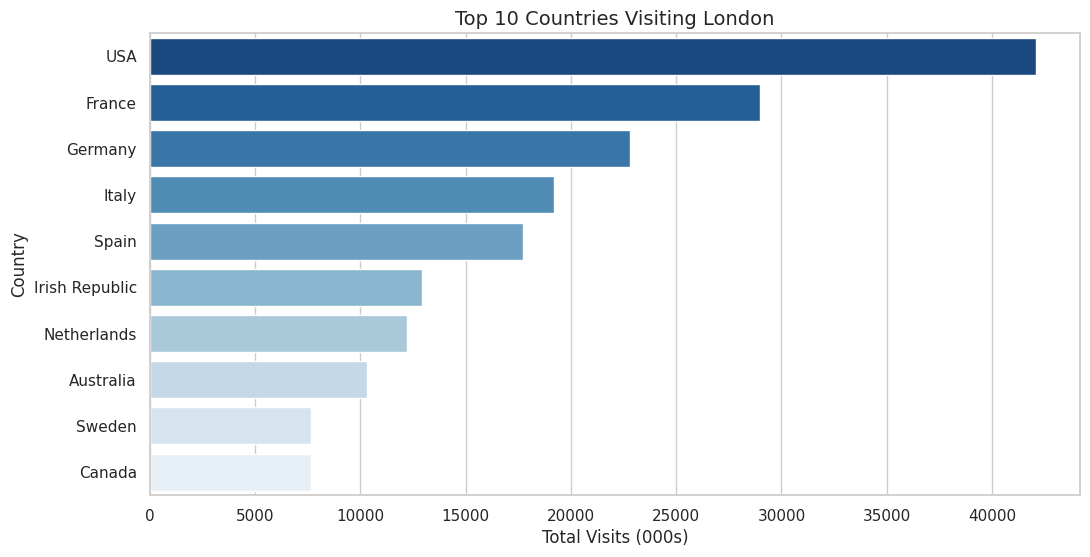

In [187]:
#Top 10 Visitor Countries
top_countries = df.groupby("market")["visits_000s"].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="Blues_r")
plt.title("Top 10 Countries Visiting London", fontsize=14)
plt.xlabel("Total Visits (000s)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.show()

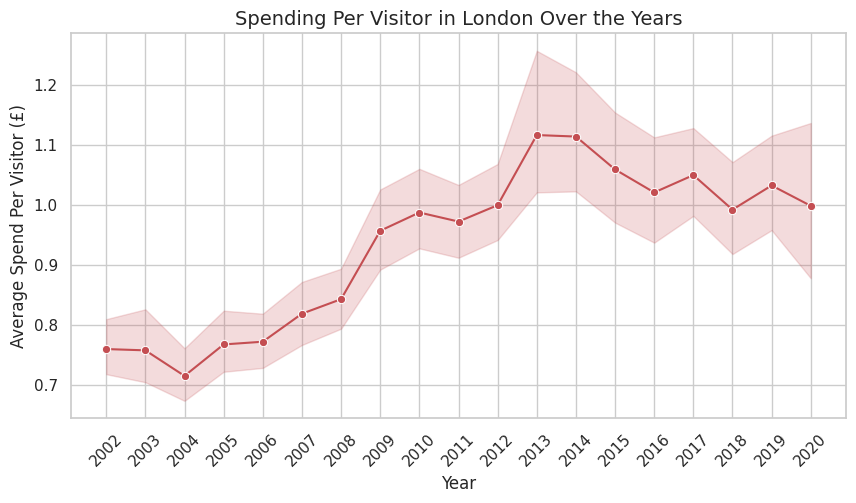

In [188]:
#Spending Per Visitor Trends Over Time
df["spend_per_visitor"] = df["spend_m"] / df["visits_000s"]
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="year", y="spend_per_visitor", estimator="mean", marker="o", color="r")
plt.xticks(np.arange(df["year"].min(), df["year"].max() + 1, step=1), rotation=45)
plt.title("Spending Per Visitor in London Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Spend Per Visitor (£)", fontsize=12)
plt.show()

<ipython-input-189-51dba8802aad>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="dur_stay", order=df["dur_stay"].value_counts().index, palette="coolwarm")


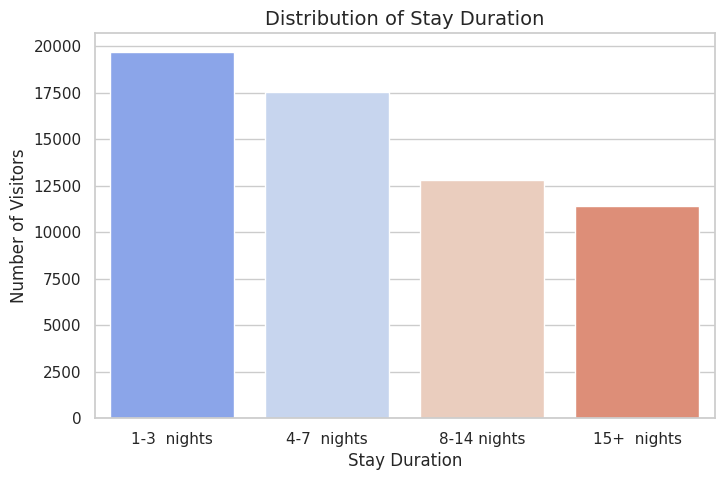

In [189]:
#Stay Duration Distribution**
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="dur_stay", order=df["dur_stay"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Stay Duration", fontsize=14)
plt.xlabel("Stay Duration", fontsize=12)
plt.ylabel("Number of Visitors", fontsize=12)
plt.show()

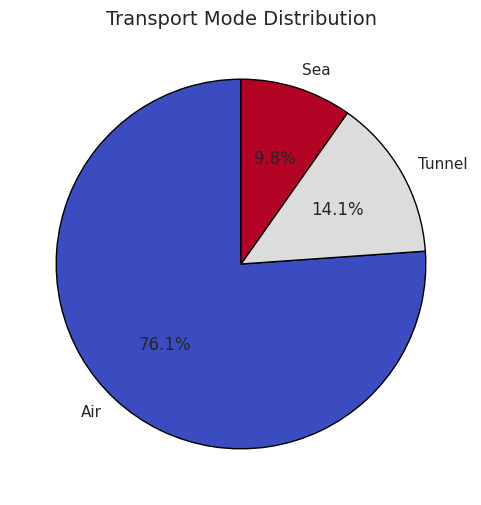

In [190]:
#Mode of Transport Usage**
plt.figure(figsize=(6, 6))
df["mode"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="coolwarm", wedgeprops={'edgecolor': 'black'})
plt.title("Transport Mode Distribution", fontsize=14)
plt.ylabel("")
plt.show()

<ipython-input-191-85641146c75e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="purpose", order=df["purpose"].value_counts().index, palette="muted")


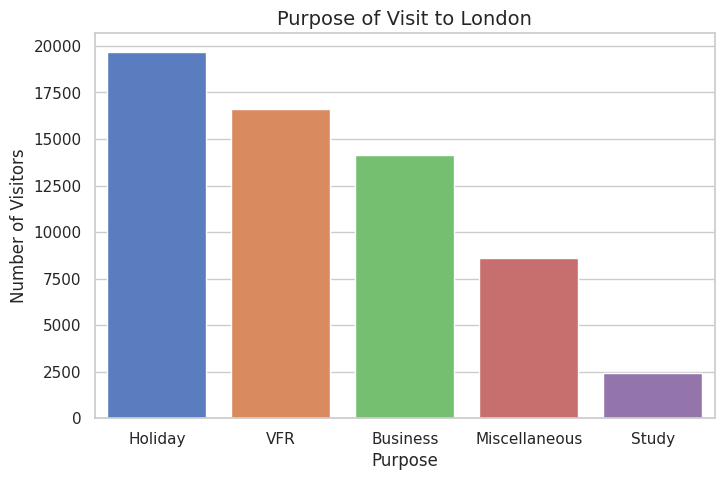

In [191]:
#Purpose of Visit Breakdown
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="purpose", order=df["purpose"].value_counts().index, palette="muted")
plt.title("Purpose of Visit to London", fontsize=14)
plt.xlabel("Purpose", fontsize=12)
plt.ylabel("Number of Visitors", fontsize=12)
plt.show()


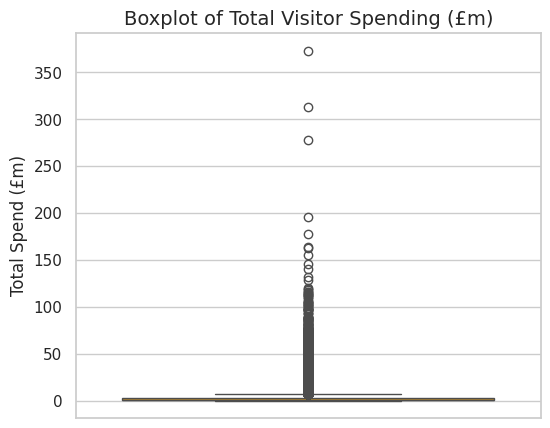

In [192]:
#Detecting Anomalies in Spending (Outliers Check)
plt.figure(figsize=(6, 5))
sns.boxplot(y=df["spend_m"], color="orange")
plt.title("Boxplot of Total Visitor Spending (£m)", fontsize=14)
plt.ylabel("Total Spend (£m)", fontsize=12)
plt.show()